# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 3: Black Litterman Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings
import matplotlib as plt

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')
pd.options.display.float_format = '{:.4f}'.format

# Date range
start = '2010-01-01'
end = '2023-05-24'

# Tickers of assets
ticker_labes = {
    'ticker': ['^KS200', '229200.KS', '143850.KS', '195930.KS', '238720.KS', '192090.KS', '148070.KS', '136340.KS', '182490.KS', '280940.KS', '130680.KS', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

# Downloading data
data = yf.download(ticker_labes['ticker'], start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data = data.dropna()

column_names = data.columns
matched_columns = [(label, ticker_labes['labels'][ticker_labes['ticker'].index(ticker)]) for label, ticker in column_names]

# Convert matched_columns to a pandas MultiIndex
matched_columns = pd.MultiIndex.from_tuples(matched_columns)

# Assign the matched columns to the prices dataframe
data.columns = matched_columns
data = data.sort_index(axis=1)

[*********************100%***********************]  15 of 15 completed


In [2]:
# Calculating returns
Y = data.pct_change().dropna()
Y = Y.droplevel(axis=1, level=0)
display(Y.head())

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
Date,,,,,,,,,,,,,,,
2017-11-10,0.0165,0.0198,-0.0035,0.0034,-0.0000,-0.0080,-0.0021,-0.0096,0.0013,-0.0004,0.0036,-0.0001,-0.0030,-0.0000,-0.0009
2017-11-13,0.0038,0.0400,-0.0049,0.0043,0.0000,-0.0139,-0.0024,-0.0034,0.0035,-0.0031,-0.0024,-0.0037,0.0065,-0.0010,0.0000
2017-11-14,-0.0038,0.0385,-0.0021,0.0009,-0.0000,-0.0011,-0.0011,-0.0080,-0.0022,0.0022,-0.0060,-0.0012,-0.0015,-0.0001,-0.0036
2017-11-15,-0.0135,0.0268,-0.0043,0.0043,0.0001,-0.0141,-0.0008,-0.0077,-0.0052,0.0045,-0.0290,0.0014,-0.0020,0.0002,0.0005
2017-11-16,-0.0011,0.0189,0.0066,-0.0051,-0.0000,0.0126,0.0000,0.0043,-0.0096,0.0116,0.0075,0.0034,0.0030,0.0007,-0.0023


## 2. Estimating Black Litterman Portfolios

### 2.1 Calculating a reference portfolio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
weights,0.0000,0.0044,0.0000,0.0000,0.2769,0.0161,0.0367,0.0000,0.2323,0.0946,0.0018,0.0000,0.0000,0.3236,0.0138


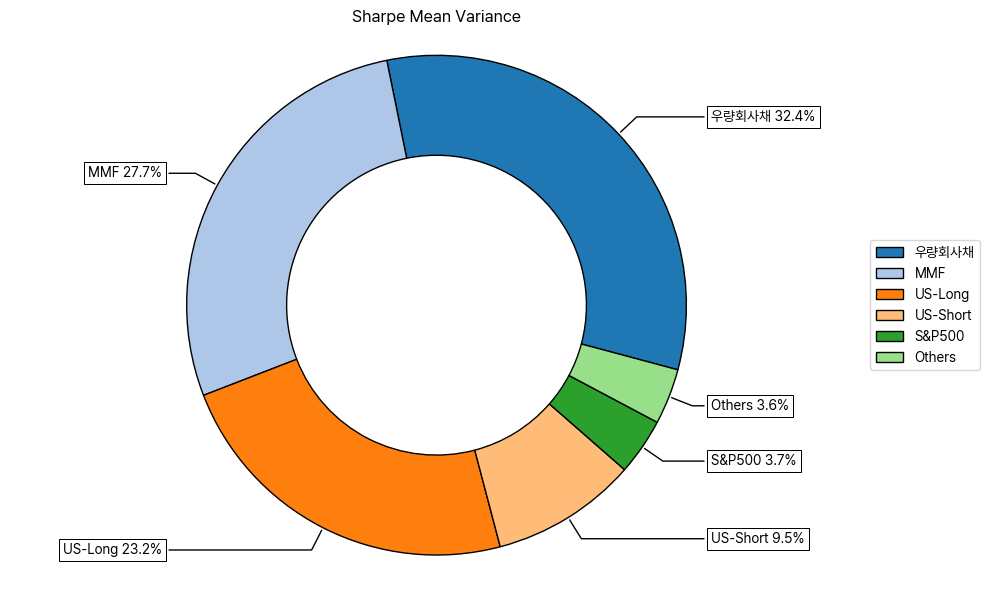

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.2 Plotting portfolio composition

In [6]:
Asset = ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
Class = ['DS', 'DS', 'FS', 'FS', 'FS', 'FS', 'Bond', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'FX', 'Cash']
Disabled = [False] * 27
Type = ['Classes'] * 11 + ['Assets'] * 16
Set = ['Class'] * 11 + [''] * 16
Position = ['DS', 'DS', 'FS', 'FS', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'Cash',
            'KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300',
            '국채10년', '우량회사채', '해외채권',
            '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short',
            'MMF', '해외채권']
TypeRelative=  [''] * 27
RelativeSet =  [''] * 27
Relative = [''] * 27
Factor = [''] * 27

# DS상하한(2), FS상하한(2), Bond상하한(2), COM상하한(2), Inverse(1), FX(1), Cash(1)
# KOSPI상한, #KOSDAQ상한, S&P상한, STO상한, Nik상한, CSI상한,
# 국채상한, 회사채상한, 해채상한,
# 금, WTI, 코숏, 달러롱, 달러숏,
# 현금하한, 해채하한
Sign = ['<=', '>=', '<=', '>=', '<=', '>=', '<=', '>=', '<=', '<=', '<=', 
        '<=', '<=', '<=', '<=', '<=', '<=',
        '<=', '<=', '<=',
        '<=', '<=', '<=', '<=', '<=',
        '>=', '>=']

Weight = [0.40, 0.40, 0.40, 0.10, 0.60, 0.20, 0.20, 0.05, 0.20, 0.20, 0.50,
          0.40, 0.20, 0.20, 0.20, 0.20, 0.20,
          0.50, 0.40, 0.40,
          0.15, 0.15, 0.20, 0.20, 0.20,
          0.01, 0.05]

constraints_list = [Asset, Class, Disabled, Type, Set, Position, Sign, Weight]
for i in constraints_list:
    print(constraints_list.index(i) , len(i))

0 15
1 15
2 27
3 27
4 27
5 27
6 27
7 27


In [7]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Consumer Staples', 'Materials'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.08, 0.1, 0.09], # Annual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financials', 'Utilities', 'Industrials']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight
0,False,Classes,Class,DS,<=,0.4000
1,False,Classes,Class,DS,>=,0.4000
2,False,Classes,Class,FS,<=,0.4000
3,False,Classes,Class,FS,>=,0.1000
4,False,Classes,Class,Bond,<=,0.6000
5,False,Classes,Class,Bond,>=,0.2000
6,False,Classes,Class,COM,<=,0.2000
7,False,Classes,Class,COM,>=,0.0500
8,False,Classes,Class,Inverse,<=,0.2000
9,False,Classes,Class,FX,<=,0.2000


In [11]:
asset_classes = {'Assets': Asset,
                 'Class': Class
                 }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': Disabled,
               'Type': Type,
               'Set': Set,
               'Position': Position,
               'Sign': Sign,
               'Weight': Weight,
               'Type Relative': TypeRelative,
               'Relative Set': RelativeSet,
               'Relative': Relative
    
}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Class,DS,<=,0.4000,,,
1,False,Classes,Class,DS,>=,0.4000,,,
2,False,Classes,Class,FS,<=,0.4000,,,
3,False,Classes,Class,FS,>=,0.1000,,,
4,False,Classes,Class,Bond,<=,0.6000,,,
5,False,Classes,Class,Bond,>=,0.2000,,,
6,False,Classes,Class,COM,<=,0.2000,,,
7,False,Classes,Class,COM,>=,0.0500,,,
8,False,Classes,Class,Inverse,<=,0.2000,,,
9,False,Classes,Class,FX,<=,0.2000,,,


In [12]:
P, Q = rp.assets_views(constraints, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0000,0.0000,0.2500,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
1,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
2,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,1.0000,-0.0000,-0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,1.0000,0.0000
5,0.0000,0.0000,0.2500,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
6,0.0000,0.0000,0.2500,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
7,0.0000,0.0000,0.2500,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,1.0000,-0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,1.0000,0.0000,0.0000


,0
0,0.4000
1,0.4000
2,0.4000
3,0.1000
4,0.6000
5,0.2000
6,0.2000
7,0.0500
8,0.2000
9,0.2000


In [13]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
weights,0.0006,0.0013,0.0036,0.0051,0.4022,0.0026,0.0011,0.0000,0.1606,0.1517,0.0007,0.0000,0.0038,0.2613,0.0056


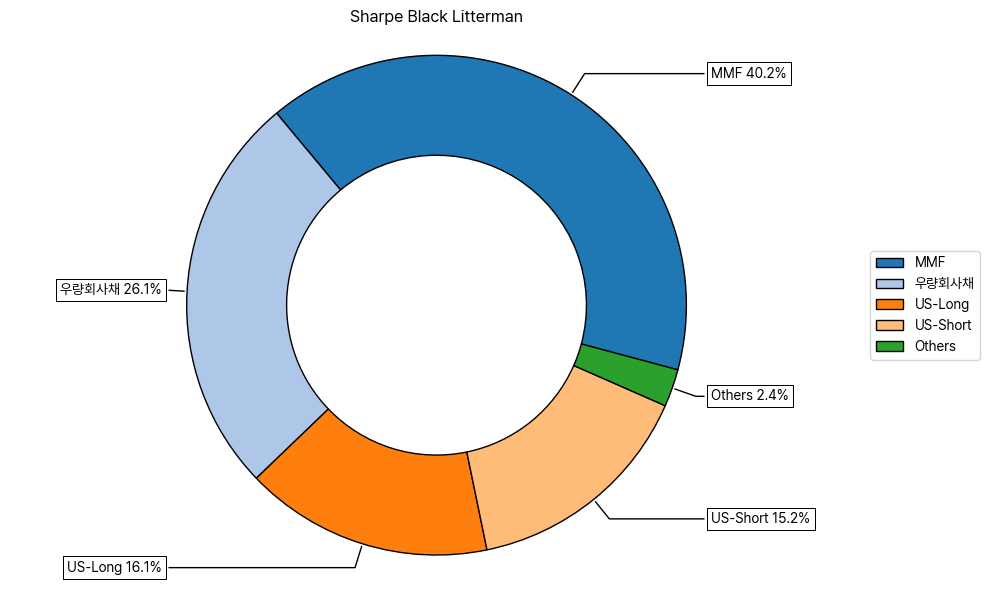

In [14]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
0,0.0010,0.0022,0.0967,0.0992,0.2006,0.0036,0.0002,0.0000,0.2104,0.2066,0.0009,0.0000,0.0058,0.1727,0.0000
1,0.0007,0.0011,0.0000,0.0008,0.4189,0.0023,0.0011,0.0000,0.1520,0.1421,0.0008,0.0060,0.0037,0.2637,0.0069
2,0.0014,0.0009,0.0000,0.0000,0.4473,0.0018,0.0009,0.0003,0.1319,0.1204,0.0013,0.0381,0.0043,0.2424,0.0092
3,0.0020,0.0009,0.0000,0.0000,0.4707,0.0016,0.0008,0.0007,0.1145,0.1020,0.0017,0.0652,0.0047,0.2242,0.0111
4,0.0026,0.0009,0.0000,0.0000,0.4921,0.0013,0.0007,0.0010,0.0987,0.0853,0.0021,0.0898,0.0051,0.2076,0.0128


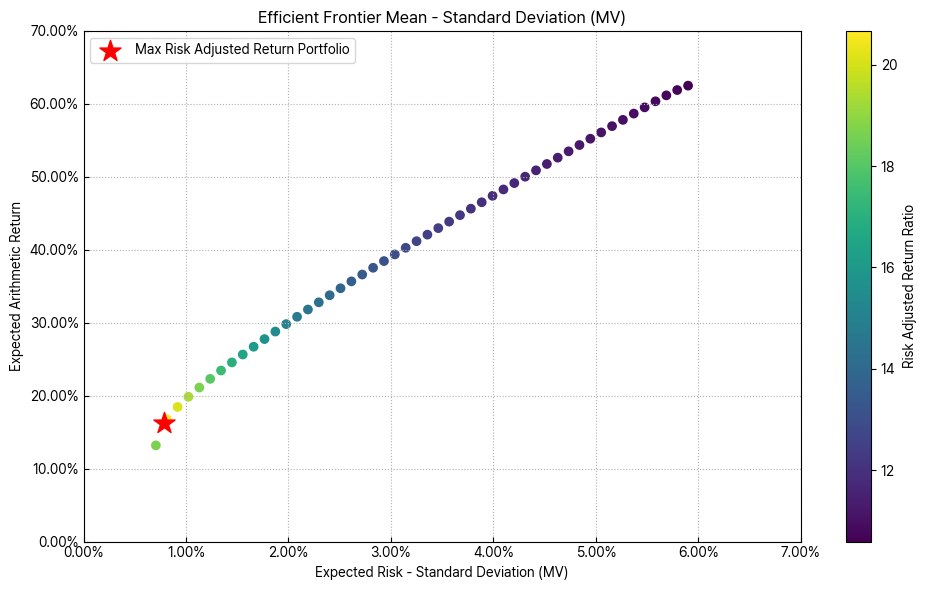

In [16]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

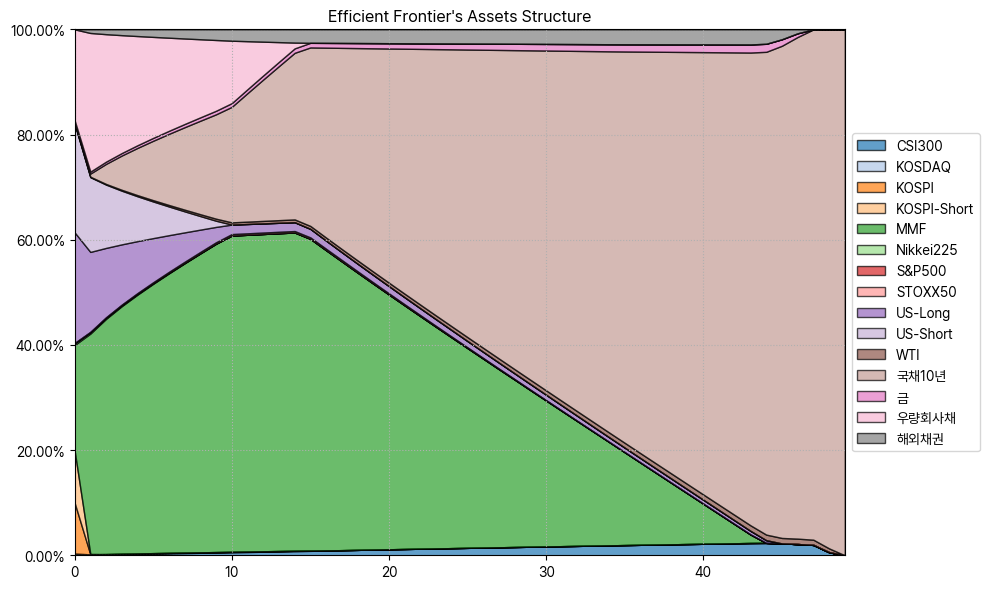

In [17]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Black Litterman Mean Risk Portfolios

When we use risk measures different than Standard Deviation, Riskfolio-Lib only considers the vector of expected returns, and use historical returns to calculate risk measures.

### 3.4 Calculate Black Litterman Portfolios for Several Risk Measures

In [18]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [19]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
CSI300,0.06%,0.05%,0.03%,0.00%,0.00%,0.00%,0.00%,0.00%,0.90%,0.60%,0.89%,0.42%,0.74%
KOSDAQ,0.13%,0.15%,0.17%,0.02%,0.31%,0.04%,0.95%,0.00%,0.15%,0.01%,0.24%,0.22%,0.22%
KOSPI,0.36%,0.00%,0.00%,0.13%,0.00%,0.00%,0.00%,1.73%,0.54%,0.92%,0.57%,0.63%,0.39%
KOSPI-Short,0.51%,0.36%,0.17%,0.13%,0.35%,0.00%,0.06%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
MMF,40.22%,83.89%,37.66%,96.73%,25.41%,89.98%,3.66%,9.99%,28.03%,21.31%,23.37%,21.08%,25.55%
Nikkei225,0.26%,0.65%,0.43%,0.02%,0.39%,0.10%,0.00%,0.00%,0.64%,0.77%,0.19%,0.91%,0.67%
S&P500,0.11%,1.94%,0.35%,0.05%,0.38%,0.04%,0.87%,1.40%,0.13%,0.00%,0.00%,0.00%,0.06%
STOXX50,0.00%,0.12%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
US-Long,16.06%,6.18%,17.61%,1.51%,21.69%,4.02%,25.10%,16.43%,26.76%,31.18%,30.45%,30.78%,28.42%
US-Short,15.17%,0.00%,15.73%,1.33%,20.21%,3.39%,18.89%,4.47%,23.52%,28.18%,27.74%,27.89%,25.30%


<Axes: >

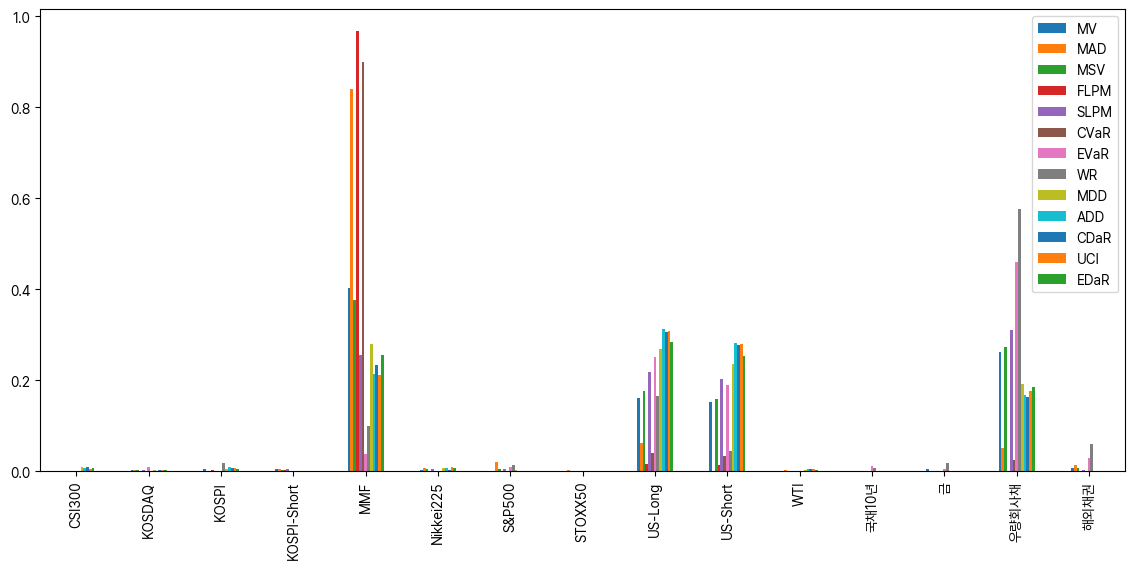

In [20]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)